In [1]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot

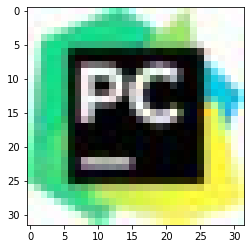

In [2]:
img = cv2.imread('lenna.png')
img = cv2.imread('pycharm.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pyplot.imshow(img)

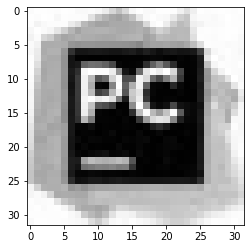

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pyplot.imshow(img, cmap="gray")

In [4]:

img = torch.from_numpy(img.reshape(1, 1, *img.shape) / 255.)
img = img.type(torch.FloatTensor)
print(img.shape)

torch.Size([1, 1, 32, 32])


In [5]:
def convolve(img, kernel):
    kernel = torch.tensor(kernel)
    kernel = kernel.type(torch.FloatTensor)
    kernel = kernel.view(1, 1, *kernel.shape).repeat(1, 1, 1, 1)
    return torch.conv2d(img, kernel, padding=0)

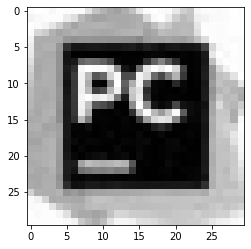

In [6]:
# Identity
convolved = convolve(img,
                     [
                         [0., 0., 0.],
                         [0., 1., 0.],
                         [0., 0., 0.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

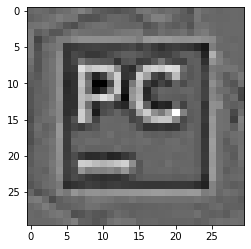

In [7]:
# Edge detection 2 (Laplace 8)
convolved = convolve(img,
                     [
                         [-1., -1., -1.],
                         [-1., 8., -1.],
                         [-1., -1., -1.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

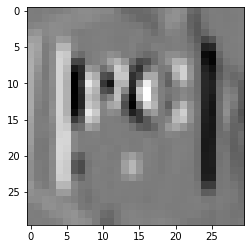

In [8]:
# Edge detection 2 (Prewitt vertical)
prewitt_v = convolve(img,
                     [
                         [1., 0., -1.],
                         [1., 0., -1.],
                         [1., 0., -1.]
                     ]
                    )
pyplot.imshow(prewitt_v[0, 0], cmap="gray")

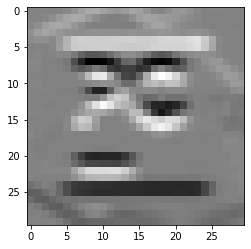

In [9]:
# Edge detection 2 (Prewitt hotizontal)
prewitt_h = convolve(img,
                     [
                         [1., 1., 1.],
                         [0., 0., 0.],
                         [-1., -1., -1.]
                     ]
                    )
pyplot.imshow(prewitt_h[0, 0], cmap="gray")

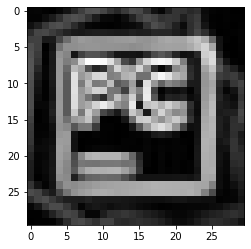

In [10]:
prewitt_combined = pow(pow(prewitt_h, 2) + pow(prewitt_v, 2), 0.5)
pyplot.imshow(prewitt_combined[0, 0], cmap="gray")

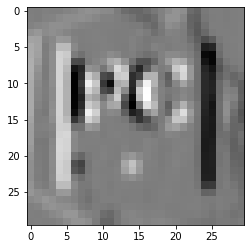

In [11]:
# Edge detection 2 (Sobel vertical)
sobel_v = convolve(img,
                     [
                         [1., 0., -1.],
                         [2., 0., -2.],
                         [1., 0., -1.]
                     ]
                    )
pyplot.imshow(sobel_v[0, 0], cmap="gray")

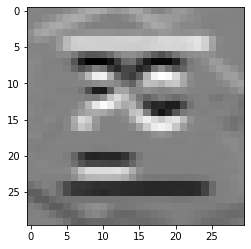

In [12]:
# Edge detection 2 (Sobel hotizontal)
sobel_h = convolve(img,
                     [
                         [1., 2., 1.],
                         [0., 0., 0.],
                         [-1., -2., -1.]
                     ]
                    )
pyplot.imshow(sobel_h[0, 0], cmap="gray")

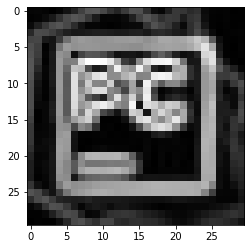

In [13]:
sobel_combined = pow(pow(sobel_h, 2) + pow(sobel_v, 2), 0.5)
pyplot.imshow(sobel_combined[0, 0], cmap="gray")

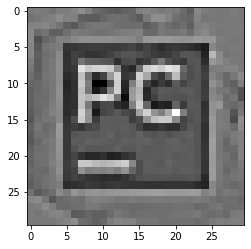

In [14]:
# Sharpen 1
convolved = convolve(img,
                     [
                         [-1., -1., -1.],
                         [-1., 9., -1.],
                         [-1., -1., -1.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

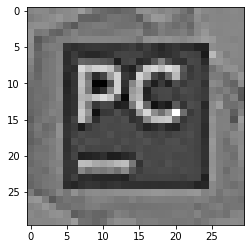

In [15]:
# Sharpen 2
convolved = convolve(img,
                     [
                         [0., -1., 0.],
                         [-1., 5., -1.],
                         [0., -1., 0.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

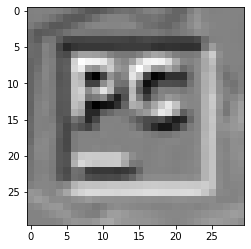

In [16]:
# Emboss
convolved = convolve(img,
                     [
                         [-2., -1., -1.],
                         [-1., 1., 1.],
                         [0., 1., 2.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

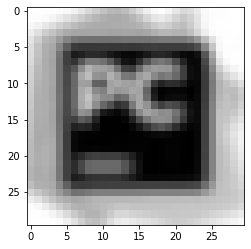

In [17]:
# Box blur
convolved = convolve(img,
                     [
                         [1., 1., 1.],
                         [1., 1., 1.],
                         [1., 1., 1.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

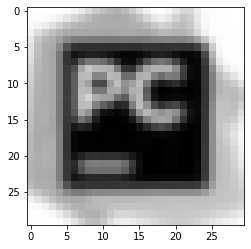

In [18]:
# Gaussian blur
convolved = convolve(img,
                     [
                         [1., 2., 1.],
                         [2., 4., 2.],
                         [1., 2., 1.]
                     ]
                    )
pyplot.imshow(convolved[0, 0], cmap="gray")

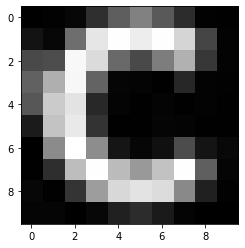

In [19]:
# a little more complex kernel cropped from the image
kernel = cv2.imread("C.png")
kernel = cv2.cvtColor(kernel, cv2.COLOR_BGR2GRAY)
pyplot.imshow(kernel, cmap="gray")

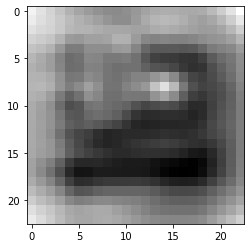

In [20]:
convolved = convolve(img, kernel)
# convolved = torch.max_pool2d(convolved, 3)
pyplot.imshow(convolved[0, 0], cmap="gray")

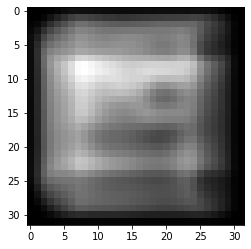

In [21]:

kernel = torch.tensor(kernel)
kernel = kernel.view(1, 1, *kernel.shape).repeat(1, 1, 1, 1)
kernel = kernel.type(torch.FloatTensor)
transpose = torch.conv_transpose2d(convolved, kernel)

pyplot.imshow(transpose[0, 0], cmap="gray")


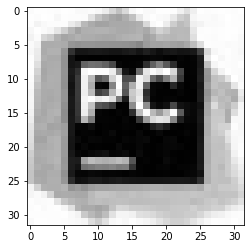

In [22]:
pyplot.imshow(img[0, 0], cmap="gray")